In [60]:
import pandas as pd

data = pd.read_csv('../datasets/cardio.csv', delimiter=';')
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [61]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
target = data['cardio']
features = data.drop(['id', 'cardio'], axis=1)

In [63]:
features['bmi'] = features['weight'] / (features['height']/100)**2
features = features.drop(['weight', 'height'], axis=1)

In [64]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)

encoded_gendere = one_hot_encoder.fit_transform(pd.DataFrame(features['gender']))
features['female'] = encoded_gendere[0:, 0]
features['male'] = encoded_gendere[0:, 1]
features = features.drop(['gender'], axis=1)

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42, max_depth=20)
rfc.fit(features, target);

In [66]:
rfc.score(features, target)

0.8787

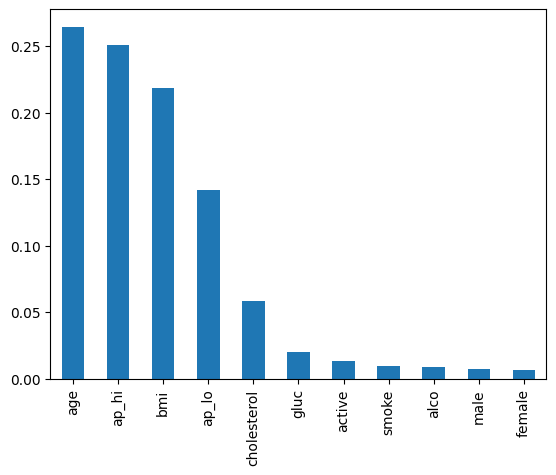

In [67]:
features_importance = pd.DataFrame(rfc.feature_importances_, index=features.columns)
features_importance = features_importance.sort_values(0, ascending=False)
features_importance.plot(kind='bar', legend=False);

In [68]:
"""Some features do not look important, for example alco, or smoke. It's occure, even when max tree depth is limited, to protect overfitting.
But level of smoking, or drunking people in dataset is low, less than 10%, and more than 50% are ill. Perhaps that features are important in not many cases,
but still are valuable. It is easly to fit model with accuracy 99,9%, but with very dep tree, more 50 levels.
I will try train random forests tree classifier,to protect by overfitting.
Also I will train Ada boost model, to utilize not very frequently occuring data for alco and smoke. """;